In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.interactive import printing
printing.init_printing(use_latex=True)

# Exercícios de Simulação

Os exercícios a seguir são relacionados ao teorema de amostragem, quantização e amostragem PCM. Alguns códigos serão mostrados a seguir, esses códigos servirão de auxílio para a resolução de questões a seguir. Ttente compreender cada parte do cógigo para que os exercícios sejam bem aproveitados.

## Amostragem e Quantização
O processo de transformar um sinal analógico em um sinal digital passa por dois processos principais: O de amostragem e o de quantização. A amostragem é o processo no qual um sistema de amostragem toma um valor do sinal analógico periódicamente. O Processo de quantização, por outro lado, é o processo pelo qual o sinal amostrado têm seus valores de amplitude quantificados em valores específicos e limitados.

Portanto, um sinal amostrado tem valores periódicos no tempo e níveis infinitos de amplitude, um sinal quantificado tem níveis finitos de amplitude e infinitos valores no tempo. Um sinail digital é um sinal amostrado e discretizado.

### Amostragem
Um sinal analógico que passa por um sistema de amostragem é, portanto representado como:
$$x[n] = \sum_{n}x(t)\cdot\delta(nT)=\sum_{n}x(t-nT)$$
onde $\delta(\cdot)$ é a função delta de dirac, $n$ é o índice da amostra e $T$ o período de amostragem do sinal.

Podemos portanto supor que um sinal amostrado pode ser representado por:

In [2]:
Tt = 1e-2
fst = 1.0/Tt
t = np.linspace(0, 2, fst)

T = 0.08 * fst / 2 # frequencia é amostragem por segundo, portanto tem que dividir por 2

d = np.zeros(np.shape(t))

for k in range(0, len(t)):
    if int(k%T) == 0.0:
        d[k] = 1.0
        
n = t * d
x = np.sin(2*np.pi*n) 

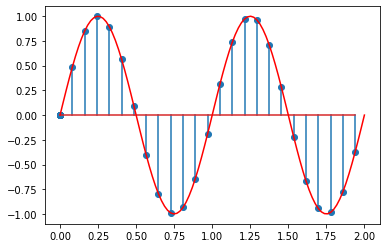

In [3]:
y = np.sin(2*np.pi*t)
plt.stem(n, x)
plt.plot(t, y, 'r')

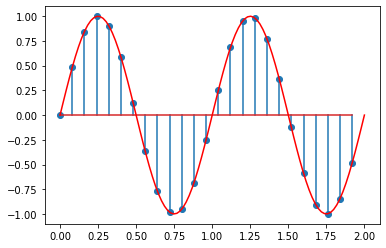

In [4]:
T = 0.08
n = np.arange(0, 2, T)
x = np.sin(2*np.pi*n)
xt = np.sin(2*np.pi*t)

plt.stem(n, x)
plt.plot(t, xt, 'r')

O sinal $x(t)$ é aqui representado pela função $x(t)=\sin(t)$ que está amostrada pela função $\delta$ com período de amostragem $T=0.2$ do intervalo de tempo $t$ variando entre $0<t<2\pi$. Note que os valores de amplitude são infinitos entre $-1<x[n]<1$, pois recebem os valores da função $\sin$. O período de amostragem é usualmente substituido pela frequência de amostragem ilustrada por $$T=\frac{1}{f_s}$$

Note que quando aumentamos o período de amostragem o sinal amostrado $x[n]$ representa cada vez menos o sinal $\sin$.

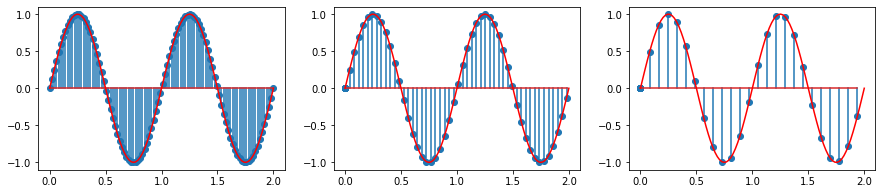

In [5]:
fig, ax = plt.subplots(figsize=(15, 3))

T = np.array([0.02, 0.04, 0.08]) * fst/ 2
fs = 1/T

for i in range(0,len(T)):
    d = np.zeros(np.shape(t))

    for k in range(0, len(t)):
        if int((k)%T[i]) == 0.0:
            d[k] = 1.0
    
    n = t * d
    x = np.sin(2*np.pi*n)

    plt.subplot(1, len(T), i+1)
    plt.stem(n, x)
    plt.plot(t, np.sin(2*np.pi*t), 'r')

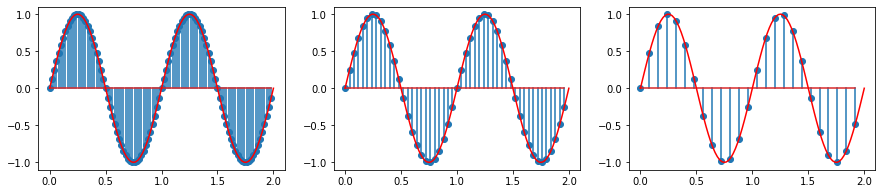

In [6]:
fig, ax = plt.subplots(figsize=(15, 3))

T = [0.02, 0.04, 0.08]

for i in range(0,len(T)):
    n = np.arange(0, 2, T[i])
    x = np.sin(2*np.pi*n)

    plt.subplot(1, len(T), i+1)
    plt.stem(n, x)
    plt.plot(t, np.sin(2*np.pi*t), 'r')

Existe portanto um limite teórico do período de amostragem (frequência de amostragem) que define a possibilidade de o sinal original $x(t)$ ser recomposto à partir do sinal amostrado $x[n]$. De outra maneira, caso a frequência de amostragem seja menor do que esse limiar de frequência, a reconstrução do sinal exibe certas imperfeições, conhecidas como aliasing.

Esse limiar teórico é conhecido como *Teorema de Nyquist-Shannon*, onde é dado que:

> Se uma função $x(t)$ não contém frequências maiore do que $B$ hertz, então essa função (*sinal*) pode ser completamente determinado por uma sequência de pontos do sinal amostrado espaçadas por $1/(2B)$.

Portanto qualquer freqência de amostragem superior à $2B$ samples por segundo é suficiente para que o sinal seja recomposto.

Podemos visualizar facilmente o Teorema de Nyquist-Shannon com a transformada de Fourier do sinal amostrado, que é dada por:
$$X_{s}(f)\ \triangleq \sum _{k=-\infty}^{\infty}X\left(f-kf_{s}\right)=\sum _{n=-\infty}^{\infty}T\cdot x(nT)\ e^{-i2\pi nTf}$$

Perceba que quando o sinal é subamostrado a função exponencial que da transformada de Fourier tem menos valores que contribuem para o termo de frequência quando o sinal é subamostrado. Isso contribui para o fenômeno de aliasing.

Podemos visualizar a transformada como abaixo:

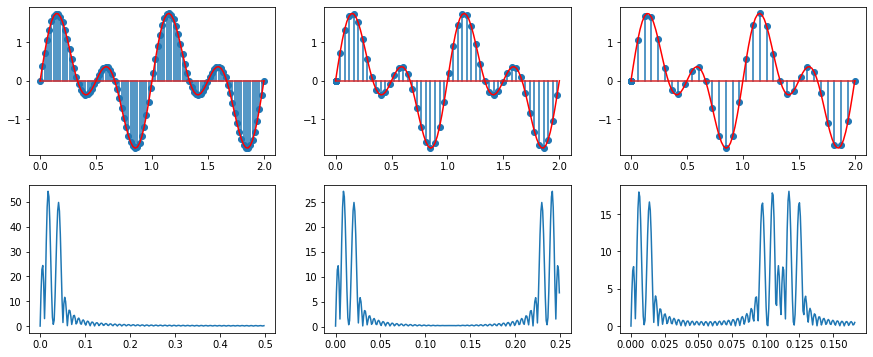

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))

T = np.array([0.02, 0.04, 0.06]) * fst/2
fs = 1/T

for i in range(0, len(T)):
    d = np.zeros(np.shape(t))
    for k in range(0, len(t)):
        if int((k)%T[i]) == 0.0:
            d[k] = 1.0
    
    n = t * d
    x = np.sin(2*np.pi*n) + np.sin(2*np.pi*2*n)
    xt = np.sin(2*np.pi*t) + np.sin(2*np.pi*2*t)
    
    X = np.fft.fft(x, 512)
    f = np.fft.fftfreq(len(X), T[i])

    plt.subplot(2, len(T), i+1)
    plt.stem(n, x)
    plt.plot(t, xt, 'r')

    plt.subplot(2, len(T), i+len(T)+1)
    plt.plot(f[:len(X)//2], np.abs(X)[:len(X)//2])

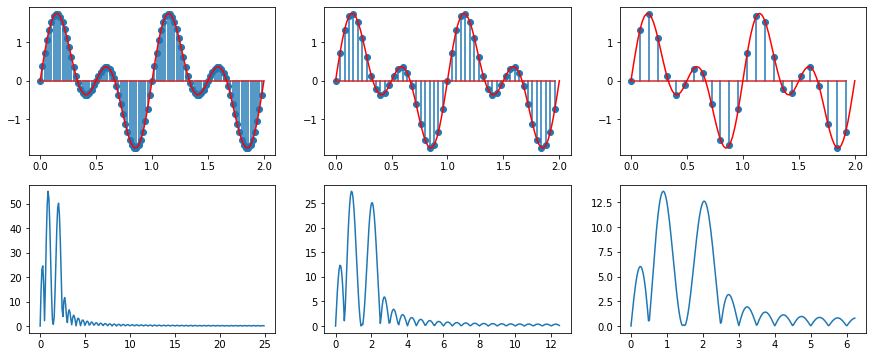

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))

T = np.array([0.02, 0.04, 0.08])

for i in range(0,len(T)):
    n = np.arange(0, 2, T[i])
    
    x = np.sin(2*np.pi*n) + np.sin(2*np.pi*2*n)
    xt = np.sin(2*np.pi*t) + np.sin(2*np.pi*2*t)
    
    X = np.fft.fft(x, 512)
    f = np.fft.fftfreq(len(X), T[i])

    plt.subplot(2, len(T), i+1)
    plt.stem(n, x)
    plt.plot(t, xt, 'r')

    plt.subplot(2, len(T), i+len(T)+1)
    plt.plot(f[:len(X)//2], np.abs(X)[:len(X)//2])

### Quantização

O processo de quantização em matemática é o processo de mapear valores de entrada de um grande conjunto de valores (usualmente de valores contínuos) em conjuntos menores, a quantidade de valores desse conjunto passa agora a ser contável.

Por exemplo, suponha que um conjunto de valores contínuos que pode variar dentre $[-5,5]$ - suponha que esses são valores da imagem de uma função $x(t)$. No entanto, por algum motivo, podemos representar essa imagem apenas com números inteiros. Devemos portanto definir valores de arredondamento para representar situações em que $x(t)$ assume valores não inteiros ($x(t) = 3.4235$, por exemplo).

Esse processo de representação de valores finitos por truncagem ou arredondamento é um típico exemplo do processo de quantização. O processo de quantização nos permite a possibilidade de representar valores analógicos com a utilização de uma quantidade finita de símbolos (números binários, por exemplo).

Num segundo exemplo, suponha que queremos quantizar nosso sinal $x(t)$ amostrado:

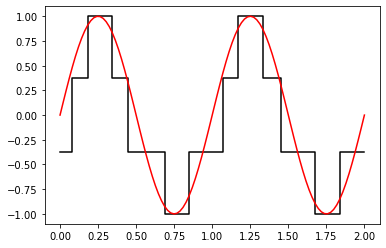

In [9]:
def quant4(sig):
    # quantização do sinal em cinco niveis de resolução
    r = np.zeros(np.shape(sig))
    for i in range(0,len(sig)):
        if sig[i] >= -1.125 and sig[i] < -0.875: #00
            r[i] = -1
        elif sig[i] >= -0.875 and sig[i] < 0.375: #01
            r[i] = -0.375
        elif sig[i] >= 0.375 and sig[i] < 0.875: #10
            r[i] = 0.375
        else: #11
            r[i] = 1
    return r

xt = np.sin(2*np.pi*t)
xq = quant4(xt)

plt.step(t, xq, 'k', where='post')
plt.plot(t, xt, 'r')

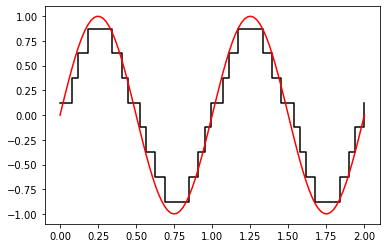

In [10]:
def quant8(sig):
    # quantização do sinal em cinco niveis de resolução
    r = np.zeros(np.shape(sig))
    for i in range(0,len(sig)):
        if sig[i] >= -1.125 and sig[i] < -0.875: #000
            r[i] = -0.875
        elif sig[i] >= -0.875 and sig[i] < -0.625: #001
            r[i] = -0.625
        elif sig[i] >= -0.625 and sig[i] < -0.375: #010
            r[i] = -0.375
        elif sig[i] >= -0.375 and sig[i] < -0.125: #011
            r[i] = -0.125
        elif sig[i] >= -0.125 and sig[i] < 0.375: #100
            r[i] = 0.125
        elif sig[i] >= 0.375 and sig[i] < 0.625: #101
            r[i] = 0.375
        elif sig[i] >= 0.625 and sig[i] < 0.875: #110
            r[i] = 0.625
        else: #111
            r[i] = 0.875
    return r

xt = np.sin(2*np.pi*t)
xq = quant8(xt)

plt.step(t, xq, 'k', where='post')
plt.plot(t, xt, 'r')

Nos códigos de exemplo acima vemos o sinal $x(t)$ quantizado em quatro e oito níveis. As quantizações mostradas utilizarão 2 e 3 bits respectivamente na codificação binária desses sinais. Podemos calcular a quantidade de bits necessárias por nível de quantização por $$n_B = \log_2N$$ onde $n_B$ é o número de bits necessário e $N$ é o número de níveis da quantização.